In [24]:
%matplotlib inline

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam, load_occupancy

# Load the classification dataset
X, y = load_spam()

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Instantiate the visualizer with the classification model
#model = LogisticRegression(multi_class="auto", solver="liblinear")
model = GaussianNB()

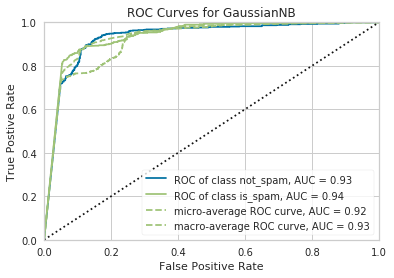

In [32]:
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

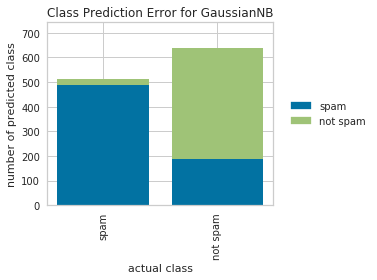

In [37]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(model, classes= ["spam","not spam"])
# Fit the training data to the visualizer
viz.fit(X_train, y_train)

# Evaluate the model on the test data
viz.score(X_test, y_test)

# Draw visualization
viz.show()

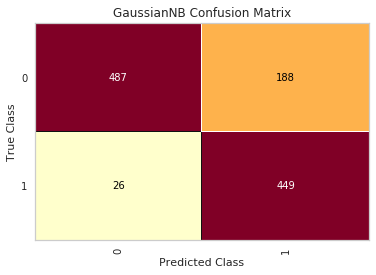

In [33]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

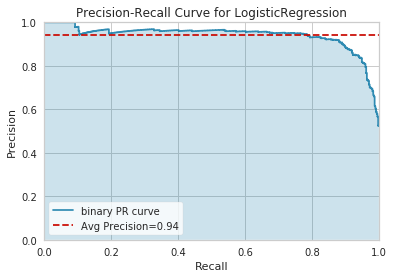

In [29]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


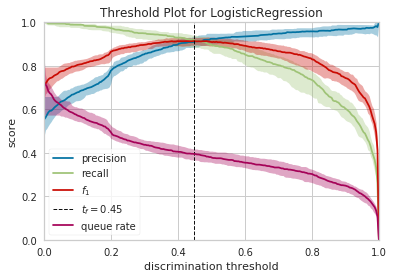

In [30]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

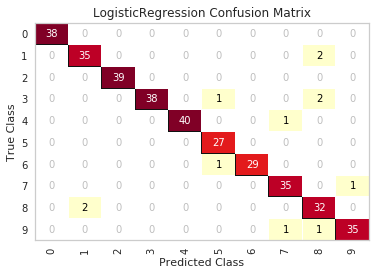

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()